In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression. Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [3]:
data = pd.read_csv('data/communities/communities.csv',na_values=['?'])

In [4]:
data.shape

(1994, 100)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [24]:
data.isnull().sum().sum()

1

In [32]:
data.columns[data.isna().any()]

Index(['OtherPerCap'], dtype='object')

In [33]:
OPC_mean = data.OtherPerCap.mean()
data.OtherPerCap.fillna(OPC_mean, axis = 0, inplace = True)

In [36]:
## make sure no missing values
data.columns[data.isna().any()]

Index([], dtype='object')

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

#### Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set

In [37]:
data.describe(include='all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Auburncity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [38]:
data.shape

(1994, 100)

In [425]:
columns =data.columns.values
print(" columns.size  :",columns.size)

columns = columns[:columns.size -1]
columns
print("columns.size ",columns.size)

 columns.size  : 100
columns.size  99


#### Separate the target attribute for regression.

In [40]:
## extract the target column
target_ViolentCrimesPerPop = data['ViolentCrimesPerPop']

target_ViolentCrimesPerPop.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [41]:
## drop state and communityname. Also drop ViolentCrimesPerPop as its a target field
vs_matrix = data.drop(['state','communityname','ViolentCrimesPerPop'],axis=1,inplace=False)
vs_matrix.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [44]:
print("Input data shape ",data.shape)
print("Target Shape :",target_ViolentCrimesPerPop.shape)
print(" vs_matrix shape ",vs_matrix.shape)

Input data shape  (1994, 100)
Target Shape : (1994,)
 vs_matrix shape  (1994, 97)


In [45]:
#Split the data into training and test sets (80%-20% split).
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, target_ViolentCrimesPerPop, test_size=0.2, random_state=33)

print(" Test Shape",vs_test.shape,"\n Train Shape",vs_train.shape)


 Test Shape (399, 97) 
 Train Shape (1595, 97)


#### b. Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). Compute the RMSE value on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [46]:
x = np.array(vs_train)
y = np.array(vs_target_train)

# In order to do multiple regression we need to add a column of 1s as the coefficient for x0
x = np.array([np.concatenate((v,[1])) for v in x])

In [47]:
print("x shape : ",x.shape)
print("y shape : ",y.shape)

x shape :  (1595, 98)
y shape :  (1595,)


In [48]:
x

array([[0.01, 0.54, 0.02, ..., 0.2 , 0.47, 1.  ],
       [0.99, 0.42, 0.59, ..., 0.55, 0.62, 1.  ],
       [0.01, 0.53, 0.02, ..., 0.03, 0.09, 1.  ],
       ...,
       [0.02, 0.48, 0.23, ..., 0.47, 0.98, 1.  ],
       [0.01, 0.56, 0.09, ..., 0.19, 0.01, 1.  ],
       [0.96, 0.32, 1.  , ..., 0.83, 1.  , 1.  ]])

In [49]:
y

array([0.08, 0.4 , 0.02, ..., 0.19, 0.04, 1.  ])

In [50]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)

In [53]:
## closed form solution in linear regression
## β^=(XTX)−1 * XTy
def standReg(x_arr,y_arr):
    xMat = np.mat(x_arr)
    yMat = np.mat(y_arr).T
    
    xTx = xMat.T * xMat
    
    if(np.linalg.det(xTx) == 0.0):
        print('This matrix is singular , cannot do inverse')
        return
    
    ws = xTx.I * ( xMat.T * yMat )
    
    return ws
    
    

In [54]:
ws = standReg(x,y)
print('Regression weights/coefficients \n',ws)


Regression weights/coefficients 
 [[-0.01]
 [-0.05]
 [ 0.22]
 [-0.05]
 [-0.02]
 [ 0.05]
 [ 0.1 ]
 [-0.17]
 [-0.13]
 [ 0.07]
 [-0.13]
 [ 0.04]
 [-0.2 ]
 [-0.21]
 [ 0.04]
 [-0.07]
 [ 0.01]
 [ 0.02]
 [-0.1 ]
 [ 0.35]
 [ 0.08]
 [-0.35]
 [-0.03]
 [-0.04]
 [ 0.03]
 [ 0.05]
 [ 0.04]
 [ 0.3 ]
 [-0.24]
 [-0.01]
 [-0.05]
 [ 0.08]
 [ 0.02]
 [ 0.23]
 [-0.05]
 [-0.04]
 [ 0.35]
 [ 0.21]
 [ 0.08]
 [-0.36]
 [-0.16]
 [-0.02]
 [-0.26]
 [-0.05]
 [-0.01]
 [ 0.01]
 [-0.16]
 [-0.27]
 [ 0.14]
 [-0.12]
 [ 0.01]
 [ 0.05]
 [-0.19]
 [ 0.14]
 [-0.03]
 [-0.24]
 [ 0.64]
 [-0.38]
 [-0.  ]
 [-0.15]
 [ 0.05]
 [-0.22]
 [ 0.57]
 [ 0.02]
 [-0.22]
 [-0.73]
 [ 0.2 ]
 [ 0.15]
 [ 0.03]
 [ 0.15]
 [-0.04]
 [ 0.65]
 [ 0.07]
 [-0.08]
 [-0.03]
 [ 0.05]
 [-0.03]
 [-0.24]
 [ 0.1 ]
 [ 0.09]
 [-0.25]
 [-0.08]
 [-0.1 ]
 [ 0.39]
 [ 0.06]
 [-0.03]
 [-0.08]
 [ 0.14]
 [ 0.13]
 [ 0.17]
 [-0.01]
 [-0.03]
 [ 0.04]
 [ 0.02]
 [ 0.02]
 [ 0.  ]
 [-0.04]
 [ 0.52]]


In [55]:
print(ws.shape)

(98, 1)


In [56]:
xMat = np.mat(x)
yMat = np.mat(y)

yHat = xMat * ws

In [57]:
print('yHat Shape',yHat.shape)
print('yMat shape', yMat.shape)

yHat Shape (1595, 1)
yMat shape (1, 1595)


In [68]:
# Compute the RMSE value on the full training data (the 80% partition)
yHat = xMat * ws
yHatT = yHat.T ## needed to make it a row vector
err = abs(yHatT - yMat)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err, err.T)

rmse = np.sqrt(total_error/len(yHat))
print("RMSE : ",rmse)

RMSE :  [[0.13]]


In [842]:
err.shape

(1, 1595)

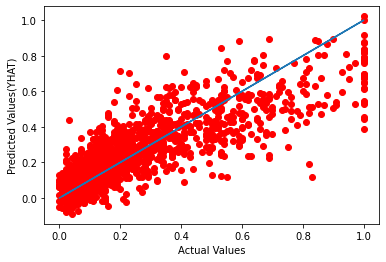

In [72]:
# Plot the correlation between the predicted and actual values of the target attribute.

plt.plot(yMat, yHatT,'ro')
plt.plot([0,1.0,0.01],[0,1.0,0.01])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values(YHAT)')
plt.show()

In [379]:
#### get correlation between different all possible pairs
np.corrcoef(yHat.T,y)

array([[1.  , 0.84],
       [0.84, 1.  ]])

In [380]:
## Elements on the diagonal are 1 because yHat and yMat are perfectly correlated. 
## The correlation between yHat and yMat is  0.84 indicating they are highly correlated

#### perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE

In [88]:
## divide data into 10 folds
kfold = KFold(n_splits=10)

total_error_fold = 0;

for train,test in kfold.split(x):
    ws_fold = standReg(x[train],y[train])
    
    xFoldMat = np.mat(x[train])
    yFoldMat = np.mat(y[train])

    yFoldHat = xFoldMat * ws_fold
   
    
    yHat_fold_T = yFoldHat.T ## needed to make it a row vector
    xval_fold_err = abs(yHatT - yMat)

    # Dot product of error vector with itself gives us the sum of squared errors
    total_error_fold = np.dot(xval_fold_err, xval_fold_err.T)

rmse_10cv = np.sqrt(total_error_fold/len(x))
print('rmse with 10 cross fold = ',rmse_10cv)

rmse with 10 cross fold =  [[0.13]]


#### Now evaluating rmse with 10Kfold using te sklearn kit just for comparision sake

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
# Create linear regression object
linreg = LinearRegression()

In [81]:
# Train the model using the training set
linreg.fit(x,y)

LinearRegression()

In [82]:
# First, let's compute errors on all training instances
p = linreg.predict(x) # p is the array of predicted values

# Now we can constuct an array of errors
err = abs(p-y)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.1261959313342669


In [83]:
# We can view the regression coefficients
print('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [-0.01 -0.05  0.22 -0.05 -0.02  0.05  0.1  -0.17 -0.13  0.07 -0.13  0.04 -0.2  -0.21  0.04 -0.07  0.01  0.02 -0.1
  0.35  0.08 -0.35 -0.03 -0.04  0.03  0.05  0.04  0.3  -0.24 -0.01 -0.05  0.08  0.02  0.23 -0.05 -0.04  0.35  0.21
  0.08 -0.36 -0.16 -0.02 -0.26 -0.05 -0.01  0.01 -0.16 -0.27  0.14 -0.12  0.01  0.05 -0.19  0.14 -0.03 -0.24  0.64
 -0.38 -0.   -0.15  0.05 -0.22  0.57  0.02 -0.22 -0.73  0.2   0.15  0.03  0.15 -0.04  0.65  0.07 -0.08 -0.03  0.05
 -0.03 -0.24  0.1   0.09 -0.25 -0.08 -0.1   0.39  0.06 -0.03 -0.08  0.14  0.13  0.17 -0.01 -0.03  0.04  0.02  0.02
  0.   -0.04  0.  ]


In [84]:
## divide data into 10 folds
kfold = KFold(n_splits=10)

xval_err = 0;

for train,test in kfold.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv_sklear = np.sqrt(xval_err/len(x))

In [87]:
print("rmse in closed form ",rmse.flatten().A[0][0]," rmse 10kFold closed form ",rmse_10cv)
print("sklearn => Original rmse: ",rmse_train, "     10 fold rmse: ",rmse_10cv)

rmse in closed form  0.12619593133426688  rmse 10kFold closed form  [[0.13]]
sklearn => Original rmse:  0.1261959313342669      10 fold rmse:  [[0.13]]


### both closed form and sklear appear to produce similar result

### as we can see from above the RMSE increased after 10 Kfolds 

## 1.c Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression

In [92]:
from sklearn import feature_selection

In [93]:
data.shape

(1994, 100)

In [94]:
vs_matrix = data.drop(['state','communityname','ViolentCrimesPerPop'],axis=1,inplace=False)
vs_matrix.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [95]:
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, target_ViolentCrimesPerPop, test_size=0.2, random_state=33)


In [96]:
print("vs_train shape ",vs_train.shape, " test shape ",vs_test.shape)

print("train target shape ",vs_target_train.shape," Test target shape ",vs_target_test.shape)

x_train = np.array(vs_train)
y_train = np.array(vs_target_train)

x_test = np.array(vs_test)
y_test = np.array(vs_target_test)

vs_train shape  (1595, 97)  test shape  (399, 97)
train target shape  (1595,)  Test target shape  (399,)


In [97]:
vs_target_train

1184    0.08
401     0.40
1864    0.02
1390    0.18
1066    0.07
        ... 
658     0.16
578     0.08
1752    0.19
391     0.04
1044    1.00
Name: ViolentCrimesPerPop, Length: 1595, dtype: float64

In [98]:
linreg = LinearRegression()

In [99]:
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
import math

In [100]:
percentiles = range(1,100,5)
scorer='neg_mean_absolute_error'
fold = 5

def optimal_num_features(model , train_data , target , num_of_fold , percentile_range,scorer):
    
    results = []
    
    print("index \t  cv_score")
    for i in percentile_range:
        fs = SelectPercentile(f_regression,percentile=i)
        X_train_fs = fs.fit_transform(train_data,target)

        cv_scores = abs(cross_val_score(model, X_train_fs, target, cv=num_of_fold,scoring=scorer))

        print (" ",i,"  \t",cv_scores.mean())

        results = np.append(results,cv_scores.mean())

    optimal_percent = np.where(results == results.min())[0]
    print ("\nOptimal percentile of features:{0}".format(percentiles[int(optimal_percent)]))
    
    return optimal_percent, results



optimal_percent, results = optimal_num_features(linreg,x_train,y_train,fold,percentiles,scorer)

optimal_num_features = int(math.floor(percentiles[int(optimal_percent)]*x_train.shape[1]/100))
print ("\noptimal_percent : ",optimal_percent," Optimal number of features:{0}".format(optimal_num_features), "\n")

index 	  cv_score
  1   	 0.11287401163402822
  6   	 0.09943268475677307
  11   	 0.09900510519125442
  16   	 0.09909059079526808
  21   	 0.0975068622131086
  26   	 0.09608904536542377
  31   	 0.09478480270197638
  36   	 0.09474955355002232
  41   	 0.09435370428857699
  46   	 0.09466441760571027
  51   	 0.09498773346781053
  56   	 0.09532085164805941
  61   	 0.095749668892545
  66   	 0.09572089544915725
  71   	 0.09583132229767208
  76   	 0.09519157369784723
  81   	 0.0954256882753639
  86   	 0.09513624310358182
  91   	 0.09525366581598069
  96   	 0.0952762785288391

Optimal percentile of features:41

optimal_percent :  [8]  Optimal number of features:39 



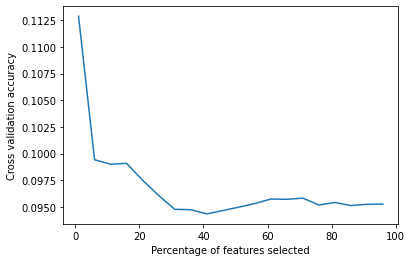

In [101]:
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results,label=' Best Percentile Graph')

#### Show the list of most informative variables and their weights

In [104]:
print("optimal_percent ",percentiles[int(optimal_percent)])
print()
fs = SelectPercentile(f_regression,percentile=percentiles[int(optimal_percent)])
X_train_fs = fs.fit_transform(x_train,y_train)

for i in range(len(vs_train.columns.values)):
    if fs.get_support()[i]:
        print (vs_train.columns.values[i],'\t', fs.scores_[i])

optimal_percent  41

population 	 256.0323547372104
racepctblack 	 1074.8895092675332
racePctWhite 	 1412.507812392418
numbUrban 	 247.77613854814712
medIncome 	 341.6325375231915
pctWWage 	 161.57075094157048
pctWInvInc 	 756.0149723312642
pctWPubAsst 	 784.5706408092445
medFamInc 	 366.9004218440599
perCapInc 	 214.9931579906875
NumUnderPov 	 400.30785689079215
PctPopUnderPov 	 578.8173652137692
PctLess9thGrade 	 319.21810810192335
PctNotHSGrad 	 472.1962078690574
PctBSorMore 	 173.3668431842841
PctUnemployed 	 533.9131521991873
PctEmploy 	 190.46526246383505
MalePctDivorce 	 602.7748935816096
FemalePctDiv 	 704.7727390048349
TotalPctDiv 	 693.1378303822019
PctFam2Par 	 1657.8650169981222
PctKids2Par 	 1972.8040638663977
PctYoungKids2Par 	 1342.1736137875287
PctTeen2Par 	 1299.5351058426954
NumIlleg 	 431.63556026914017
PctIlleg 	 1936.1208737826912
PctLargHouseFam 	 241.2338163602986
PctPersOwnOccup 	 630.760339373983
PctPersDenseHous 	 375.64590187612174
PctHousLess3BR 	 487.961680

#### As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating Mean absolute Error on the testing using 39 informatic features
print('Test Data Shape ',x_test.shape, ' \nx_train shape ',x_train.shape,' y_train shape ',y_train.shape)
print("optimal_percent ",percentiles[int(optimal_percent)])
print()
fs = SelectPercentile(f_regression,percentile=percentiles[int(optimal_percent)])
x_train_fs = fs.fit_transform(x_train,y_train)

##print('x_train_fs Data Shape ',x_train_fs.shape)

## train model
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)

## predict test 
x_test_fs = fs.transform(x_test)
##print('x_test_fs Data Shape ',x_test_fs.shape)
lr_pred = linreg.predict(x_test_fs)

lr_mae = mean_squared_error(y_test, lr_pred)

print ('Mean absolute Error (MAE) of the testing data is %0.8f' % lr_mae)

Test Data Shape  (399, 97)  
x_train shape  (1595, 97)  y_train shape  (1595,)
optimal_percent  41

Mean absolute Error (MAE) of the testing data is 0.02115297


#### using the best set of features the model gives MAE of 0.02 on test data

### 1.d Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter

In [106]:
from sklearn.linear_model import Ridge, Lasso

In [107]:

print('input data Shape',data.shape)

vs_matrix = np.array(data.drop(['state','communityname','ViolentCrimesPerPop'],axis=1,inplace=False))


vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, target_ViolentCrimesPerPop, test_size=0.2, random_state=33)

print("vs_train shape ",vs_train.shape, " test shape ",vs_test.shape)

print("train target shape ",vs_target_train.shape," Test target shape ",vs_target_test.shape)

x_train = np.array(vs_train)
y_train = np.array(vs_target_train)

x_test = np.array(vs_test)
y_test = np.array(vs_target_test)

input data Shape (1994, 100)
vs_train shape  (1595, 97)  test shape  (399, 97)
train target shape  (1595,)  Test target shape  (399,)


In [108]:
def calc_params(D, y, model, param_values, param_name, K, verbose, model_name):
    
    # Convert input to Numpy arrays
    D = np.array(D)
    y = np.array(y)

#     print(" param_values ",param_values)
#     print(" param_name ",param_name)
    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
   
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(D):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit(D[train], y[train])
            k_train_scores[j] = model.score(D[train], y[train])
            k_test_scores[j] = model.score(D[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        if(verbose):
            print(param_name, ' = ', param_value," => i :: ",i," train_scores[i] ",train_scores[i]," test_scores[i] ",test_scores[i])
    
    # plot the training and testing scores in a log scale
    fig = plt.figure(figsize=(15,10))
    
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='Test', alpha=0.4, lw=2, c='g')
    plt.title(model_name)
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    
    ##print ('The minimum MAE using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    
    # return the training and testing scores on each parameter value
    return train_scores, test_scores, min_err_alpha,min_err_idx
    

 train shape  (1595, 97)  y-train shape  (1595,)


 The minimum MAE for " Ridge " using cross validation is: 0.6492896354580718 with alpha : 0.01


 The minimum MAE for " Lasso " using cross validation is: -0.004835803679869022 with alpha : 0.41795918367346935


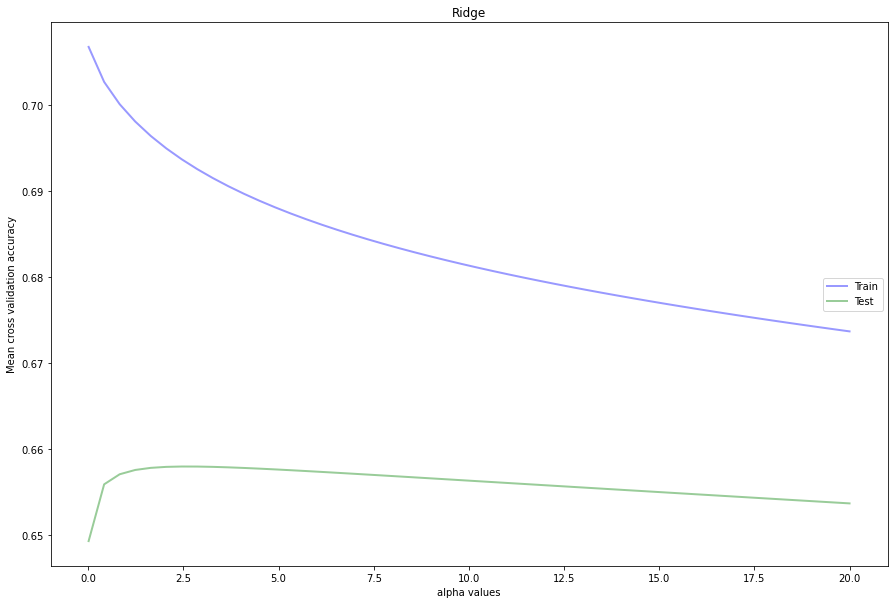

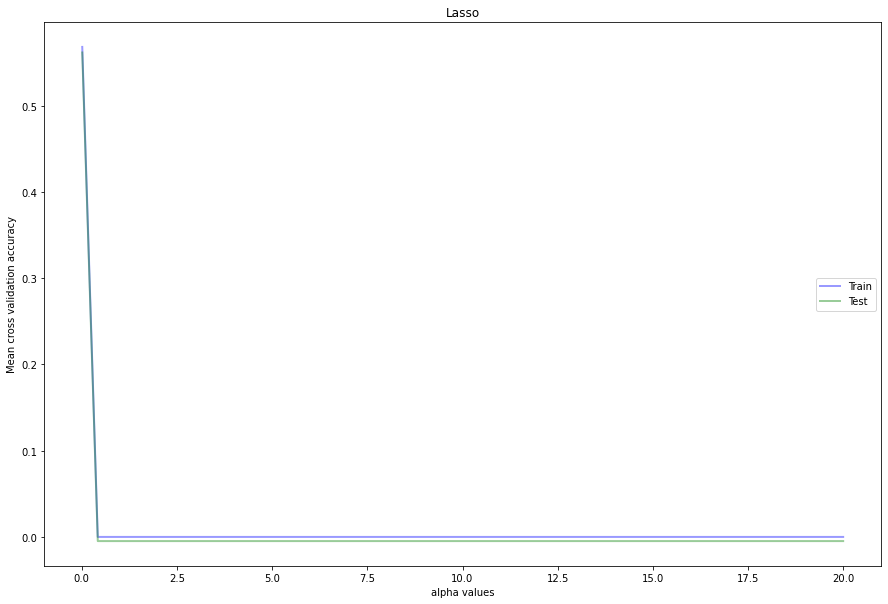

In [109]:
print(' train shape ',x_train.shape,' y-train shape ',y_train.shape)
alpha = np.linspace(.01,20,50)
alpha = np.array([float(e) for e in alpha])

number_of_fold = 5
param_name = 'alpha'
param_values = alpha
verbose = False

models = {'Ridge': Ridge(),'Lasso':Lasso()}
min_alpha = {}
for key in models.keys():
    
    train_scores, test_scores, min_err_alpha,min_err_idx = calc_params(x_train, y_train, models.get(key), param_values, param_name, number_of_fold,verbose,key)
    
    print ('\n\n The minimum MAE for \"',key,'\" using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    min_alpha[key]=min_err_alpha[0]



In [824]:
    
print("############################### running the models on Test #######################################")
model = None
for key in min_alpha.keys():
    if(key=='Ridge'):
        model = Ridge(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(x_train, y_train)    
       
    else :
        model = Lasso(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(x_train, y_train)    
        
      
    pred = model.predict(x_test)
    MAE = mean_absolute_error(y_test, pred)
    print(key,' => Mean absolute error on test data: %0.8f' % MAE, 'using alpha =',min_alpha.get(key))


############################### running the models on Test #######################################
Ridge  => Mean absolute error on test data: 0.10099847 using alpha = 0.01
Lasso  => Mean absolute error on test data: 0.18074394 using alpha = 0.41795918367346935


# It is clear that Ridge seem to perform better than the Lasso


## 1.e Next, perform regression using Stochastic Gradient Descent for regression

In [110]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [112]:

print('input data Shape',data.shape)

vs_matrix = np.array(data.drop(['state','communityname','ViolentCrimesPerPop'],axis=1,inplace=False))

# Standardize the data
scaler = StandardScaler()
scaler.fit(vs_matrix)
vs_matrix = scaler.transform(vs_matrix)


vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, target_ViolentCrimesPerPop, test_size=0.2, random_state=33)

print("vs_train shape ",vs_train.shape, " test shape ",vs_test.shape)

print("train target shape ",vs_target_train.shape," Test target shape ",vs_target_test.shape)

x_train = np.array(vs_train)
y_train = np.array(vs_target_train)

x_test = np.array(vs_test)
y_test = np.array(vs_target_test)

input data Shape (1994, 100)
vs_train shape  (1595, 97)  test shape  (399, 97)
train target shape  (1595,)  Test target shape  (399,)


In [127]:
sgdreg = SGDRegressor();

alpha = np.linspace(.0001,10,100)
alpha = np.array([float(e) for e in alpha])

parameters = {
    'penalty':["l2","l1"], 'alpha':alpha, 'max_iter':[300]
}
gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)

In [128]:
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 7.61 s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.5s finished


({'alpha': 0.10110909090909091, 'max_iter': 300, 'penalty': 'l2'},
 0.6550641059114751)

####  Using the best parameters, apply the model to the set-aside test data

In [130]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor()

val = ""
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)
    val += str(i) + "=" + str(j) + " "
    print("\n")
    
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
MAE = mean_absolute_error(y_test, pred)

print ('MAE on set-aside test data set: %0.8f' % MAE, "with",val)

The optimum value of alpha is estimated as 0.10110909090909091


The optimum value of max_iter is estimated as 300


The optimum value of penalty is estimated as l2


MAE on set-aside test data set: 0.10141046 with alpha=0.10110909090909091 max_iter=300 penalty=l2 


#### Model selection (similar to question d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. The calc_params function can take any models and any paramters so use the same function to do the model selection to find the best value for "l1_ratio" when penalty="elasticnet".



 The minimum MAE for "SGDRegressor" using cross validation is: 0.6242718063847934 with l1_ratio : 0.9494999999999999


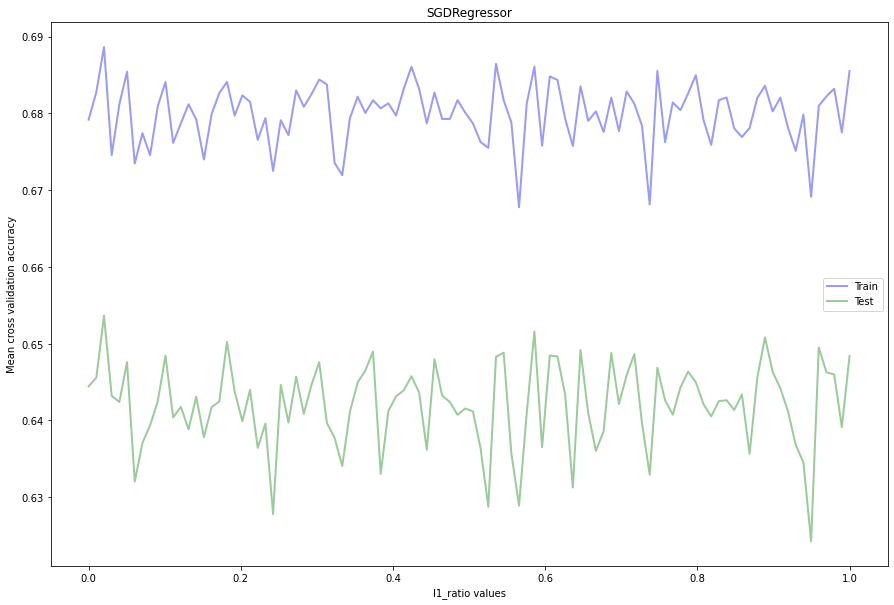

In [133]:
l1_ratio_range = np.linspace(0.0001,1, 100)
param_name = "l1_ratio" 
param_value = l1_ratio_range
verbose=False

model = SGDRegressor(penalty='elasticnet')

train_scores, test_scores, min_err_alpha,min_err_idx = calc_params(x_train, y_train,model, param_value, param_name, 5, verbose, "SGDRegressor")
    
print ('\n\n The minimum MAE for \"SGDRegressor\" using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])


#### From above output,  we can say that the l1_ratio value of 0.9494999999999999 gives the lowest MAE on training data  (0.6242718063847934). So, we will use that to run the model on set aside test data with "elasticnet" as the penalty parameter.

In [134]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='elasticnet', l1_ratio=min_err_alpha[0])
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
MAE = mean_absolute_error(y_test, pred)

print ('MAE on set-aside test data set: %0.8f' % MAE, "with penalty equals to 'elasticnet' and l1_ratio = ",min_err_alpha[0])


MAE on set-aside test data set: 0.10114047 with penalty equals to 'elasticnet' and l1_ratio =  0.9494999999999999


####  The l1-ratio is l1_ratio '0.9494999999999999' is very close L1 penalty and gives minimum MAE on test data.  The MAE seems to have better outcome on test data compared to the train data